In [2]:
#All the library imports that we needed for this project are included here.
from keras import models, layers, optimizers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from keras.applications import VGG16
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil
import skimage.io
from PIL import Image

In [3]:
#Loading the train and test csv data files as dataframes.
train_dataset = pd.read_csv('./dataset/train.csv')
test_dataset = pd.read_csv('./dataset/test.csv')

print("Length of training data is:", train_dataset.shape[0])
print("Length of testing data is:", test_dataset.shape[0])

#debug purpose.
#print("\nSummary of first 10 rows of train data:")
#train_dataset.head(10)

Length of training data is: 3662
Length of testing data is: 1928


In [4]:
#Splitting the training dataset into training and validation dataset.
#Approximately 30% is held out for validation and remaining 70% is used for training the models.
validation_dataset =train_dataset.iloc[:1200,:]
print("Validation set size:" ,validation_dataset.shape[0])

train_dataset = train_dataset.iloc[1200:,:]
print("Training set size:" ,train_dataset.shape[0])

#debug purpose.
#print(validation_dataset)
#debug purpose.
#print(train_dataset)

Validation set size: 1200
Training set size: 2462


In [5]:
#Split the training data & validation data each into 5 respective classes using the diagnosis variable from the training data.
class_train = []
class_val = []

for i in range(5):
    class_train.append(train_dataset[train_dataset['diagnosis'] == i]['id_code'].tolist())
    class_val.append(validation_dataset[validation_dataset['diagnosis'] == i]['id_code'].tolist())

#Concatenate .png extension at the end of each id to use this as a filename.
class_train = [[file_id + '.png' for file_id in class_n] for class_n in class_train]
class_val = [[file_id + '.png' for file_id in class_n] for class_n in class_val]

for i,class_n in enumerate(class_train):
    print("Length of training data in class",i,":", len(class_n))

print("")

for i,class_n in enumerate(class_val):
    print("Length of validation data in class",i,":", len(class_n))

Length of training data in class 0 : 1249
Length of training data in class 1 : 244
Length of training data in class 2 : 641
Length of training data in class 3 : 126
Length of training data in class 4 : 202

Length of validation data in class 0 : 556
Length of validation data in class 1 : 126
Length of validation data in class 2 : 358
Length of validation data in class 3 : 67
Length of validation data in class 4 : 93


In [11]:
#Original path to images directory.
train_dataset_dir = './dataset/train_images/'
test_dataset_dir = './dataset/test_images/'

#New directory for later use.
new_dataset_dir = './new_dataset/'

train_dir = os.path.join(new_dataset_dir, 'train')
#Create new directories for the labelled training data we have.
for i in range(5):
    new_folder = os.path.join(train_dir, 'class' + str(i))
    os.makedirs(new_folder, exist_ok=True)

#Create a copy of our training images to the new directories.
for i in range(5):
    for file_id in class_train[i]:
        src = os.path.join(train_dataset_dir, file_id)
        dst = os.path.join(train_dir, 'class' +  str(i), file_id)
        shutil.copy(src, dst)

val_dir= os.path.join(new_dataset_dir, 'val')
#Create new directories for the labelled validation data we have.
for i in range(5):
    new_folder = os.path.join(val_dir, 'class' + str(i))
    os.makedirs(new_folder, exist_ok=True)

#Create a copy of our validation images to the new directories.
for i in range(5):
    for file_id in class_val[i]:
        src = os.path.join(train_dataset_dir, file_id)
        dst = os.path.join(val_dir, 'class' +  str(i), file_id)
        shutil.copy(src, dst)

Class: [0] Height: 200 Width: 200
Class: [1] Height: 200 Width: 200
Class: [2] Height: 200 Width: 200
Class: [3] Height: 200 Width: 200
Class: [4] Height: 200 Width: 200


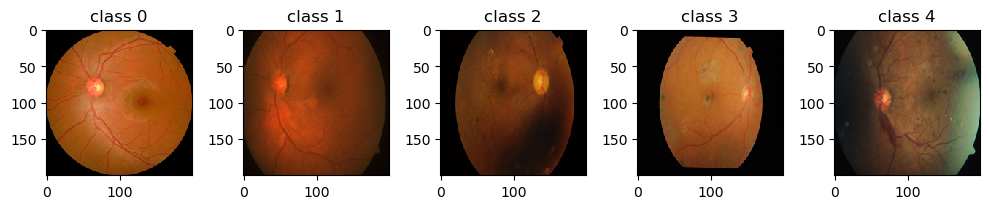

In [6]:
#Load the images into the workspace.
new_dataset_dir = './new_dataset/train/'
fig=plt.figure(figsize=(10,7))
rows=1
columns=5
#Displaying an example image for each class and their respective size.
for i in range(5):
    folder_path = os.path.join(new_dataset_dir, 'class' + str(i)+"/")
    Image_Id=os.listdir(folder_path)[i]
    Image_path=folder_path+Image_Id
    image = skimage.io.imread(Image_path)
    fig.add_subplot(rows,columns,i+1)
    skimage.io.imshow(image)
    plt.title("class "+ str(i))
    print("Class:",[i],"Height:", image.shape[0], "Width:", image.shape[1])

In [13]:
#Since the image sizes vary, we are resizing these so that all the images have uniform size before feeding those to the models.
print("Resizing images:")
train_folder = './new_dataset/train/'
val_folder = './new_dataset/val/'
test_folder = './dataset/test_images/'
w = 200
h = 200

#Resizing training data images.
print("Resizing all training data images")
for i in range(5):
    folder_path = os.path.join(train_folder, 'class' + str(i)+"/")
    #print("Resizing class",str(i),"training images")
    for j in os.listdir(folder_path):
        file = f"{folder_path}\\{j}"
        im = Image.open(file)
        im = im.resize((w, h), Image.LANCZOS)
        im.save(file)
    #print("Done resizing class",str(i),"training images")
print("Done resizing all training data images")

#Resizing validation data images.
print("Resizing all validation data images")
for i in range(5):
    folder_path = os.path.join(val_folder, 'class' + str(i)+"/")
    #print("Resizing class",str(i),"validation images")
    for j in os.listdir(folder_path):
        file = f"{folder_path}\\{j}"
        im = Image.open(file)
        im = im.resize((w, h), Image.LANCZOS)
        im.save(file)
    #print("Done resizing class",str(i),"validation images")
print("Done resizing all validation data images")

#Resizing test data images.
print("Resizing all testing data images")
for j in os.listdir(test_folder):
    file = f"{test_folder}\\{j}"
    im = Image.open(file)
    im = im.resize((w, h), Image.LANCZOS)
    im.save(file)
print("Done resizing all testing data images")

Resizing images:
Resizing all training data images


C:\Users\giris\AppData\Local\Temp\ipykernel_38668\455601926.py:17: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((w, h), Image.LANCZOS)


Done resizing all training data images
Resizing all validation data images


C:\Users\giris\AppData\Local\Temp\ipykernel_38668\455601926.py:30: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((w, h), Image.LANCZOS)


Done resizing all validation data images
Resizing all testing data images


C:\Users\giris\AppData\Local\Temp\ipykernel_38668\455601926.py:40: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((w, h), Image.LANCZOS)


Done resizing all testing data images


Class: [0] Height: 200 Width: 200
Class: [1] Height: 200 Width: 200
Class: [2] Height: 200 Width: 200
Class: [3] Height: 200 Width: 200
Class: [4] Height: 200 Width: 200


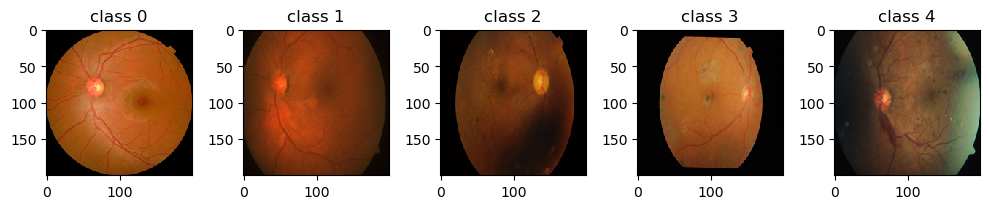

In [7]:
#Load the images into the workspace.
new_dataset_dir = './new_dataset/train/'
fig=plt.figure(figsize=(10,7))
rows=1
columns=5
#Displaying the same examples after resizing. 
for i in range(5):
    folder_path = os.path.join(new_dataset_dir, 'class' + str(i)+"/")
    Image_Id=os.listdir(folder_path)[i]
    Image_path=folder_path+Image_Id
    image = skimage.io.imread(Image_path)
    fig.add_subplot(rows,columns,i+1)
    skimage.io.imshow(image)
    plt.title("class "+ str(i))
    print("Class:",[i],"Height:", image.shape[0], "Width:", image.shape[1])

In [15]:
#Image Augmentation.
datatype = ['train','val']
class_aug = [1,3,4]

for data in datatype:
    for i in class_aug:
        image_dir = './new_dataset/' + str(data) + '/class' + str(i)

        #Iterating through all the images in the directory to generate augmented images.
        for filename in os.listdir(image_dir):
            img = load_img(os.path.join(image_dir, filename))
            img_90 = img.rotate(90)
            img_90.save(os.path.join(image_dir, 'aug_90_' + filename))
            
            img_180 = img.rotate(180)
            img_180.save(os.path.join(image_dir, 'aug_180_' + filename))
            
            img_270 = img.rotate(270)
            img_270.save(os.path.join(image_dir, 'aug_270_' + filename))

In [23]:
#Build model with convolution layers, pooling, and normalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 63, 63, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)      

In [24]:
#Compile the model using optimizer and loss function
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['acc'])

In [25]:
#preprocess data using ImageDataGenerator

#with data augmentation on training data:
'''
train_datagen = ImageDataGenerator(
    rescale=1./255,                               
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
'''

#without data augmentation:

#Normalize the pixels in range [0,255] to range [0,1] using rescale = 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
#test_datagen = ImageDataGenerator(rescale=1./255)


In [30]:
train_dir = './new_dataset/train/'
val_dir = './new_dataset/val/'
test_dir = './dataset/test_images/'

train_generator = train_datagen.flow_from_directory(
    train_dir, #image folder
    target_size=(128,128),
    batch_size=50, #was 20 before
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    batch_size=50, #was 20 before
    class_mode='categorical')

'''test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20, #was 20 before
    class_mode='categorical')'''

#save model
model.save('blindness_detection.h5')

Found 4178 images belonging to 5 classes.
Found 2058 images belonging to 5 classes.


In [35]:
#fit model with data augmentation after tuning
step_size_train=train_generator.n//train_generator.batch_size
step_size_valid=validation_generator.n//validation_generator.batch_size
history = model.fit(
    train_generator,
    steps_per_epoch=step_size_train,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/30
83/83 [==============================] - 10s 120ms/step - loss: 0.7803 - acc: 0.6880 - val_loss: 0.8810 - val_acc: 0.6283
Epoch 2/30
83/83 [==============================] - 10s 119ms/step - loss: 0.7775 - acc: 0.6923 - val_loss: 1.0273 - val_acc: 0.5820
Epoch 3/30
83/83 [==============================] - 10s 119ms/step - loss: 0.7720 - acc: 0.7023 - val_loss: 0.9414 - val_acc: 0.6176
Epoch 4/30
83/83 [==============================] - 10s 118ms/step - loss: 0.7559 - acc: 0.7064 - val_loss: 0.9438 - val_acc: 0.6361
Epoch 5/30
83/83 [==============================] - 10s 119ms/step - loss: 0.7351 - acc: 0.7081 - val_loss: 0.8859 - val_acc: 0.6361
Epoch 6/30
83/83 [==============================] - 10s 117ms/step - loss: 0.7312 - acc: 0.7161 - val_loss: 1.0597 - val_acc: 0.5966
Epoch 7/30
83/83 [==============================] - 10s 118ms/step - loss: 0.7192 - acc: 0.7132 - val_loss: 0.8895 - val_acc: 0.6380
Epoch 8/30
83/83 [==============================] - 10s 119ms/step - 

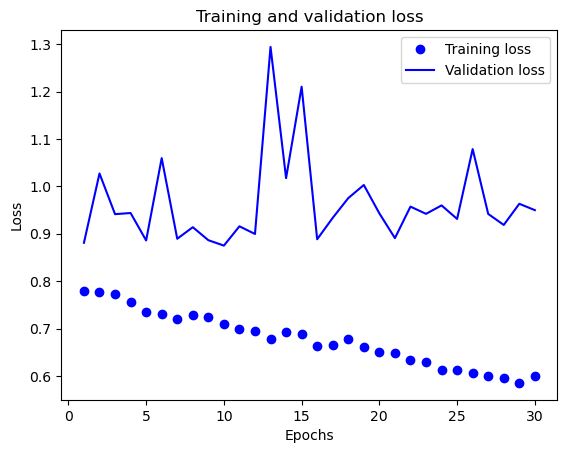

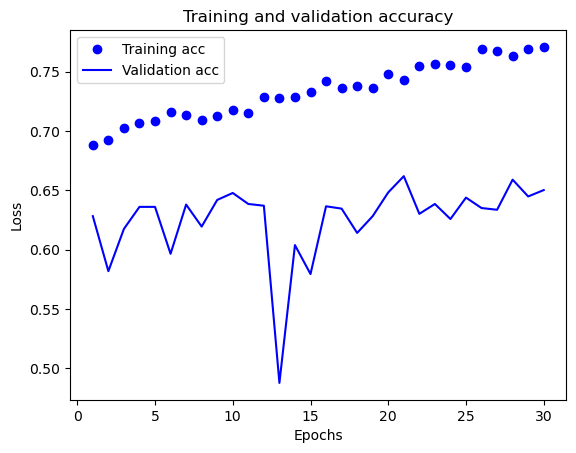

In [36]:
#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()